## __Scaling__

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Transform numerical data into same range (typically small). Some method may work best with scaling
ex. KNN, Neural Network, Linear Model
<br>
Scaling:
- MinMax Scaler
- Standard Scaler
- Robust Scaler

In [2]:
tips = sns.load_dataset('tips')
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


C:\Users\johan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\johan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


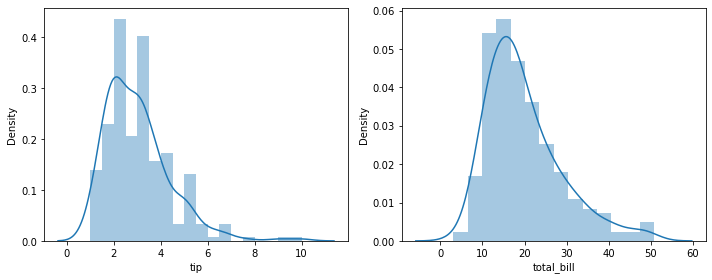

In [3]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(tips['tip'])
plt.subplot(1,2,2)
sns.distplot(tips['total_bill'])
plt.tight_layout()
plt.show()

In [4]:
tips[['tip', 'total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


from illustration above, you can see the range and descriptive statistics of each variables, tips and total bill. we will transform these variables into smaller range using:
- min max scaler
- standard scaler
- robust scaler

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [6]:
X = tips[['tip', 'total_bill']]

In [7]:
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

> ## MinMax

\begin{align}
z_i = \frac{x_i - min(x_i)}{max(x_i) - min(x_i)}
\end{align}

In [8]:
X_minmax = minmax.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax, columns=X.columns)
X_minmax

,tip,total_bill
0,0.001111,0.291579
1,0.073333,0.152283
2,0.277778,0.375786
3,0.256667,0.431713
4,0.290000,0.450775
...,...,...
239,0.546667,0.543779
240,0.111111,0.505027
241,0.111111,0.410557
242,0.083333,0.308965


In [9]:
X_minmax.describe()

,tip,total_bill
count,244.000000,244.000000
mean,0.222031,0.350145
std,0.153738,0.186477
min,0.000000,0.000000
25%,0.111111,0.215281
50%,0.211111,0.308442
75%,0.284722,0.441087
max,1.000000,1.000000


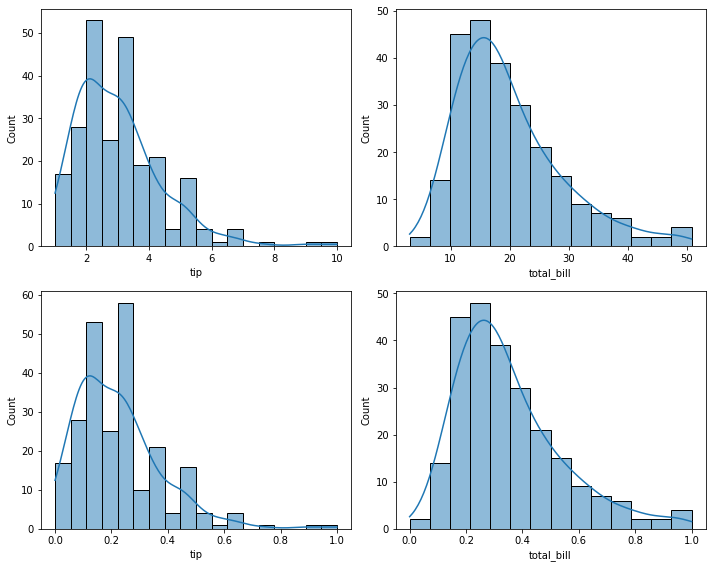

In [10]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(tips['tip'], kde=True)
plt.subplot(2,2,2)
sns.histplot(tips['total_bill'], kde=True)

plt.subplot(2,2,3)
sns.histplot(X_minmax['tip'], kde=True)
plt.subplot(2,2,4)
sns.histplot(X_minmax['total_bill'], kde=True)

plt.tight_layout()
plt.show()

from illustration above, you can see that min max scaler method has transformed each varables into range 0 to 1.

> ## StandardScaler


\begin{align}
z_i = \frac{x_i - \bar{x}}{s}
\end{align}


In [11]:
X_standard = standard.fit_transform(X)
X_standard = pd.DataFrame(X_standard, columns=X.columns)
X_standard

,tip,total_bill
0,-1.439947,-0.314711
1,-0.969205,-1.063235
2,0.363356,0.137780
3,0.225754,0.438315
4,0.443020,0.540745
...,...,...
239,2.115963,1.040511
240,-0.722971,0.832275
241,-0.722971,0.324630
242,-0.904026,-0.221287


In [12]:
X_standard.describe()

,tip,total_bill
count,2.440000e+02,2.440000e+02
mean,2.846297e-16,-6.597637e-17
std,1.002056e+00,1.002056e+00
min,-1.447189e+00,-1.881547e+00
25%,-7.229713e-01,-7.247111e-01
50%,-7.117518e-02,-2.241005e-01
75%,4.086192e-01,4.886857e-01
max,5.070772e+00,3.492068e+00


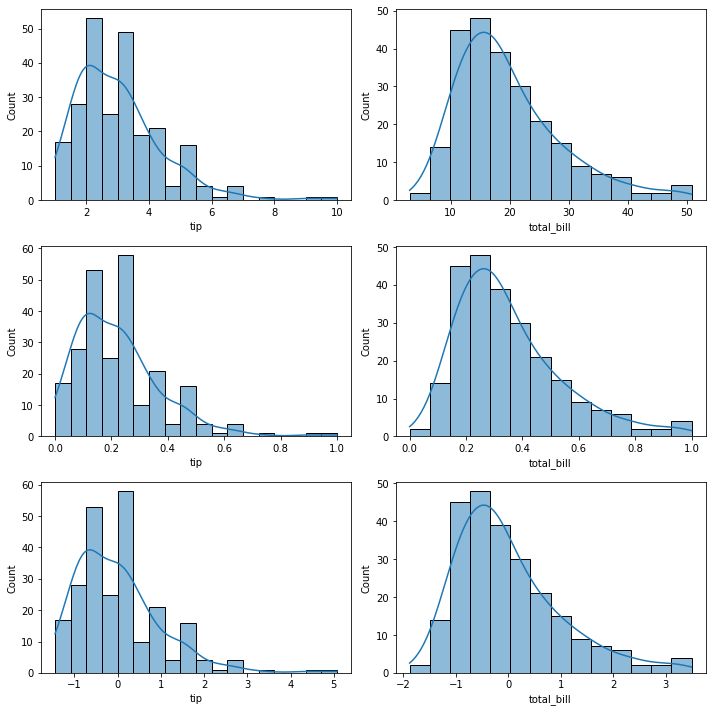

In [13]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
sns.histplot(tips['tip'], kde=True)
plt.subplot(3,2,2)
sns.histplot(tips['total_bill'], kde=True)

plt.subplot(3,2,3)
sns.histplot(X_minmax['tip'], kde=True)
plt.subplot(3,2,4)
sns.histplot(X_minmax['total_bill'], kde=True)

plt.subplot(3,2,5)
sns.histplot(X_standard['tip'], kde=True)
plt.subplot(3,2,6)
sns.histplot(X_standard['total_bill'], kde=True)

plt.tight_layout()
plt.show()

> ## RobustScaler

\begin{align}
z_i = \frac{x_i - Q_1(x_i)}{Q_3(x_i) - Q_1(x_i)}
\end{align}
​
​


In [14]:
X_robust = robust.fit_transform(X)
X_robust = pd.DataFrame(X_robust, columns=X.columns)
X_robust

,tip,total_bill
0,-1.2096,-0.074675
1,-0.7936,-0.691558
2,0.3840,0.298237
3,0.2624,0.545918
4,0.4544,0.630334
...,...,...
239,1.9328,1.042208
240,-0.5760,0.870594
241,-0.5760,0.452226
242,-0.7360,0.002319


In [15]:
X_robust.describe()

,tip,total_bill
count,244.000000,2.440000e+02
mean,0.062898,1.846886e-01
std,0.885528,8.258267e-01
min,-1.216000,-1.365955e+00
25%,-0.576000,-4.125696e-01
50%,0.000000,-1.647987e-16
75%,0.424000,5.874304e-01
max,4.544000,3.062616e+00


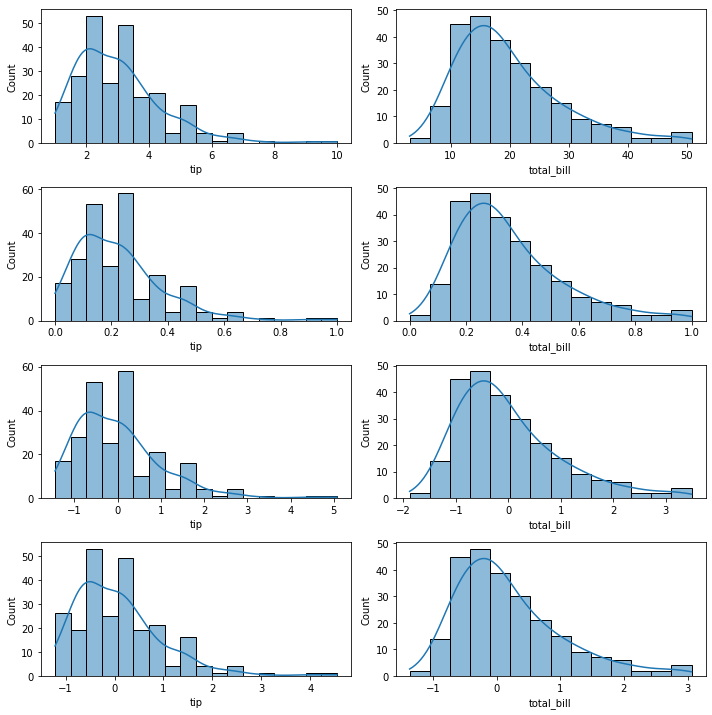

In [16]:
plt.figure(figsize=(10,10))

plt.subplot(4,2,1)
sns.histplot(tips['tip'], kde=True)
plt.subplot(4,2,2)
sns.histplot(tips['total_bill'], kde=True)

plt.subplot(4,2,3)
sns.histplot(X_minmax['tip'], kde=True)
plt.subplot(4,2,4)
sns.histplot(X_minmax['total_bill'], kde=True)

plt.subplot(4,2,5)
sns.histplot(X_standard['tip'], kde=True)
plt.subplot(4,2,6)
sns.histplot(X_standard['total_bill'], kde=True)

plt.subplot(4,2,7)
sns.histplot(X_robust['tip'], kde=True)
plt.subplot(4,2,8)
sns.histplot(X_robust['total_bill'], kde=True)

plt.tight_layout()
plt.show()

## __Encoding__

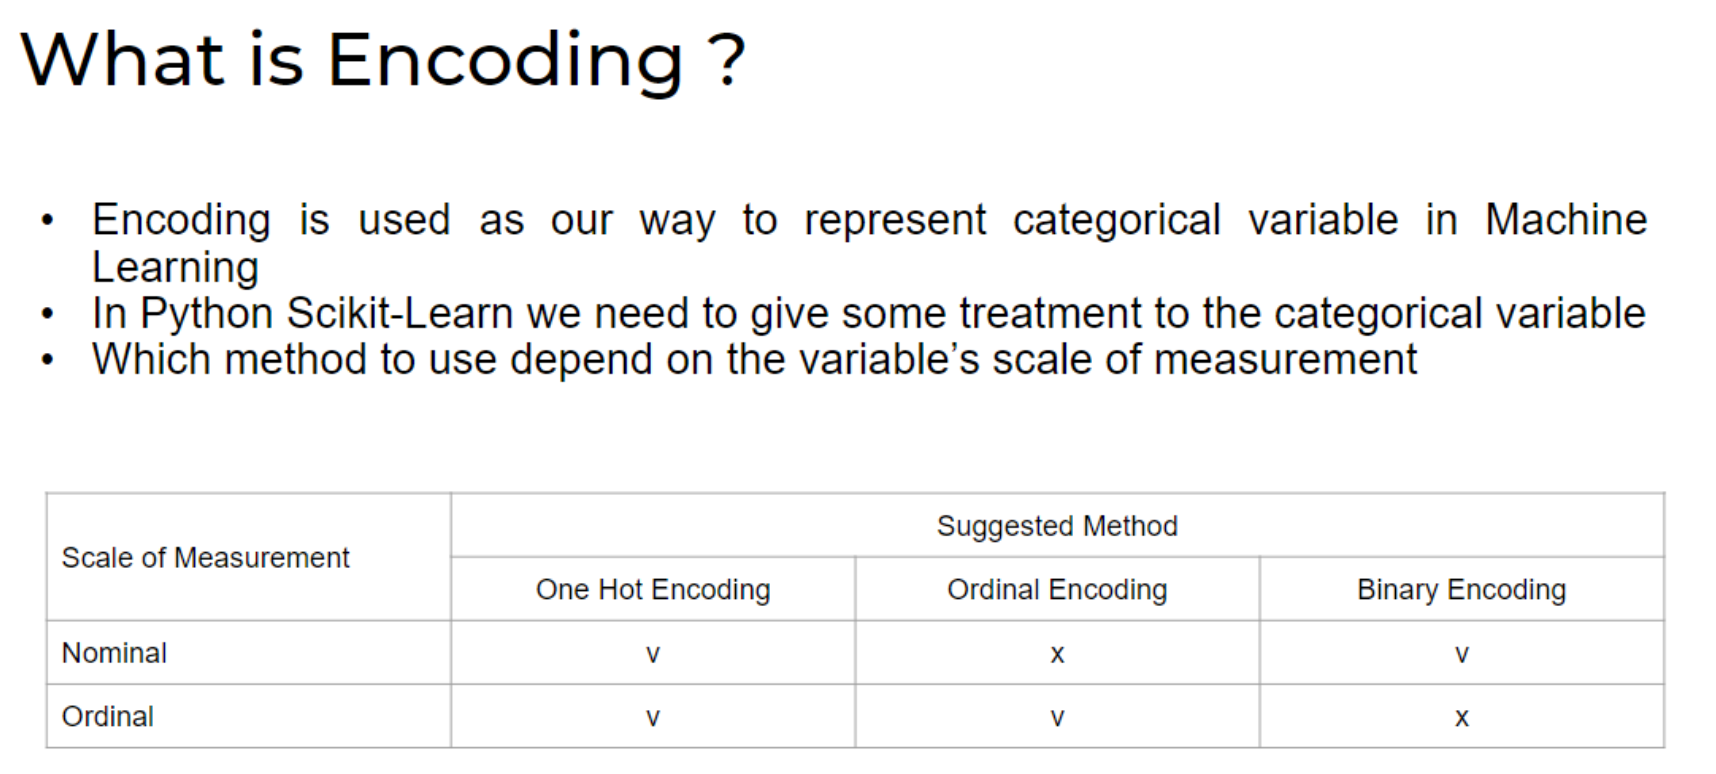

> ## Pandas: Get Dummy

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
for i in 'sex smoker day time'.split():
    print(tips[i].value_counts())

Male      157
Female     87
Name: sex, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64


these are the variables that we will transform into dummy variables. Sex two categories, smoker two categories, day four categories and time two categories. For each categories we will make one dummy variable.

In [19]:
tips_dummy = pd.get_dummies(tips, columns='sex smoker day time'.split())
tips_dummy.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


You can clearly see that each variables now has dummy variables as many as the number of category.

> ## One Hot Encoding

One Hot Encoding also can be implemented using sklearn library. we use OneHotEncoder and ColumnTransformer classes. OneHotEncoder for the one hot encoding method and ColumnTransformer to select which variable to transform.

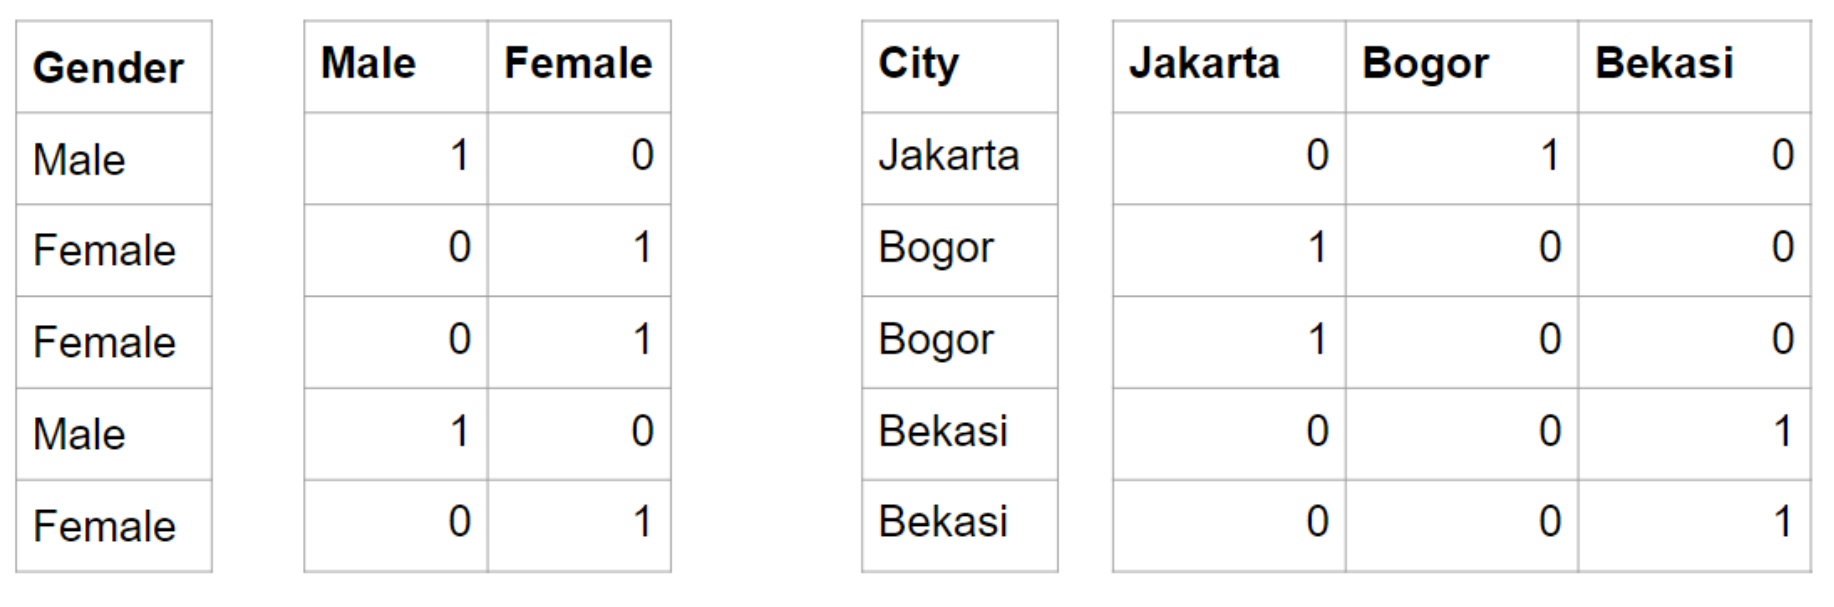

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
OneHotEncoder().get_params()

{'categories': 'auto',
 'drop': None,
 'dtype': numpy.float64,
 'handle_unknown': 'error',
 'sparse': True}

In [22]:
transformer = ColumnTransformer([
                                ('encoder', OneHotEncoder(), 'sex smoker day time'.split())
])
# 2 + 2 + 4 + 2 = 10

In [23]:
tips_encoded = pd.DataFrame(transformer.fit_transform(tips))
tips_encoded

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Using this method you don't automatically rename the variables. You must get the name of the feature separately. But, in the later course you will find out that preprocessing method from skelarn can make your whole process of the modeling easier for: cross validation and hyperparameter tuning.

In [24]:
transformer.get_feature_names()

['encoder__x0_Female',
 'encoder__x0_Male',
 'encoder__x1_No',
 'encoder__x1_Yes',
 'encoder__x2_Fri',
 'encoder__x2_Sat',
 'encoder__x2_Sun',
 'encoder__x2_Thur',
 'encoder__x3_Dinner',
 'encoder__x3_Lunch']

In [25]:
tips_encoded.columns = transformer.get_feature_names()
tips_encoded = pd.concat([tips['total_bill tip size'.split()], tips_encoded], axis=1)
tips_encoded

,total_bill,tip,size,encoder__x0_Female,encoder__x0_Male,encoder__x1_No,encoder__x1_Yes,encoder__x2_Fri,encoder__x2_Sat,encoder__x2_Sun,encoder__x2_Thur,encoder__x3_Dinner,encoder__x3_Lunch
0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,27.18,2.00,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,22.67,2.00,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,17.82,1.75,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


> ## Ordinal Encoding .map

We illustrate implementation of Ordinal encoding using .map and category_encoder library. This library can be integrated with scikit learn library and can be used in modeling process aswell.

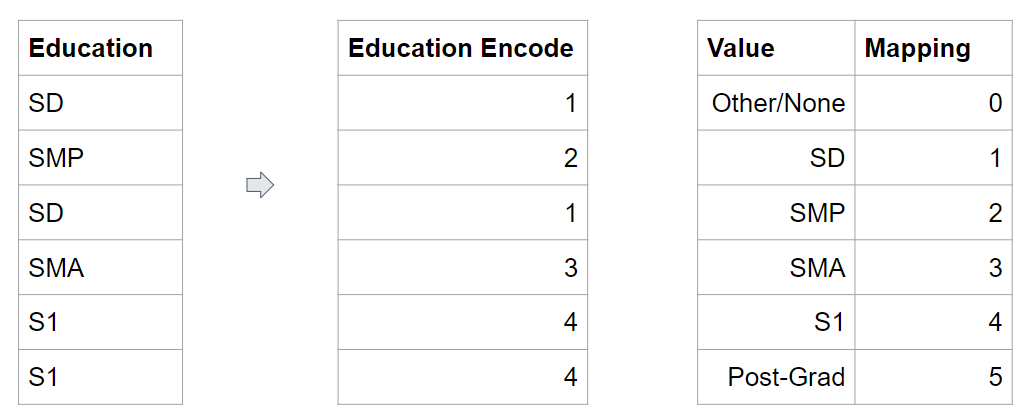

In [26]:
import category_encoders as ce

In [27]:
tips_ordinal_encoded = tips.copy()

In [28]:
tips_ordinal_encoded.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [29]:
tips_ordinal_encoded['day'] = tips_ordinal_encoded['day'].map({'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4})

In [30]:
tips_ordinal_encoded.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,4,Dinner,2
1,10.34,1.66,Male,No,4,Dinner,3
2,21.01,3.50,Male,No,4,Dinner,3
3,23.68,3.31,Male,No,4,Dinner,2
4,24.59,3.61,Female,No,4,Dinner,4


In [31]:
tips_ordinal_encoded.day.value_counts()

3    87
4    76
1    62
2    19
Name: day, dtype: int64

> ## ce.OrdinalEncoder

In [32]:
ordinal_mapping=[
    {'col': 'day',
     'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun':4}}
]

ordinal_encoder = ce.OrdinalEncoder(cols = 'day', mapping = ordinal_mapping)
dford = ordinal_encoder.fit_transform(tips['day'])
dford

,day
0,4
1,4
2,4
3,4
4,4
...,...
239,3
240,3
241,3
242,3


In [33]:
tips_ordinal_encoded = pd.concat([tips, dford], axis=1)
tips_ordinal_encoded

,total_bill,tip,sex,smoker,day,time,size,day
0,16.99,1.01,Female,No,Sun,Dinner,2,4
1,10.34,1.66,Male,No,Sun,Dinner,3,4
2,21.01,3.50,Male,No,Sun,Dinner,3,4
3,23.68,3.31,Male,No,Sun,Dinner,2,4
4,24.59,3.61,Female,No,Sun,Dinner,4,4
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3
242,17.82,1.75,Male,No,Sat,Dinner,2,3


In [34]:
ordinal_mapping=[
    {'col': 'day',
     'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun':4}},
    {'col': 'time',
     'mapping': {None: 0, 'Lunch': 1, 'Dinner': 2}}
]

ordinal_encoder = ce.OrdinalEncoder(cols = 'day time'.split(), mapping = ordinal_mapping)
dford = ordinal_encoder.fit_transform(tips['day time'.split()])
dford

,day,time
0,4,2
1,4,2
2,4,2
3,4,2
4,4,2
...,...,...
239,3,2
240,3,2
241,3,2
242,3,2


In [35]:
tips_ordinal_encoded = pd.concat([tips, dford], axis=1)
tips_ordinal_encoded

,total_bill,tip,sex,smoker,day,time,size,day,time
0,16.99,1.01,Female,No,Sun,Dinner,2,4,2
1,10.34,1.66,Male,No,Sun,Dinner,3,4,2
2,21.01,3.50,Male,No,Sun,Dinner,3,4,2
3,23.68,3.31,Male,No,Sun,Dinner,2,4,2
4,24.59,3.61,Female,No,Sun,Dinner,4,4,2
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3,2
242,17.82,1.75,Male,No,Sat,Dinner,2,3,2


> ## Binary Encoding

Binary encoding using category_encoder library. We will implement binary ecoding using the category_encoders library. We will implement binary encoding to day variable.

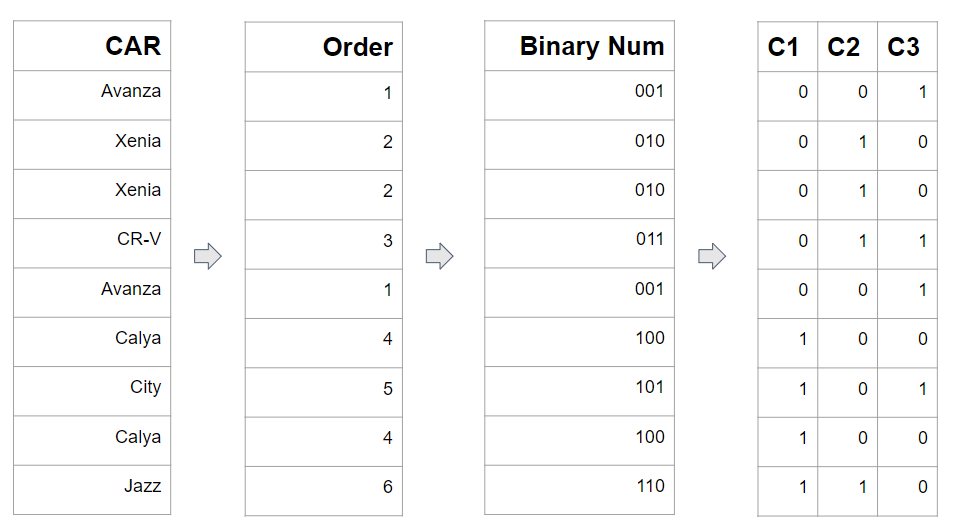

In [36]:
binary_encoder = ce.BinaryEncoder(cols = ['day'])
dfbin = binary_encoder.fit_transform(tips['day'])
dfbin

,day_0,day_1,day_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
239,0,1,0
240,0,1,0
241,0,1,0
242,0,1,0


In [37]:
tips_binary_encoded = pd.concat([tips, dfbin], axis=1)
tips_binary_encoded

,total_bill,tip,sex,smoker,day,time,size,day_0,day_1,day_2
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,1,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,0,1,0


In [38]:
tips_binary_encoded['day_0'].value_counts()

0    225
1     19
Name: day_0, dtype: int64

In [39]:
tips_binary_encoded['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [40]:
day = pd.Series('Fri Sat Sun Thur'.split(), name='day')
day_binary = binary_encoder.transform(day)
day_binary

,day_0,day_1,day_2
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,1


In [41]:
binary_encoder.inverse_transform(day_binary)

,day
0,Fri
1,Sat
2,Sun
3,Thur


# __Apply Several Preprocessing Method to Modeling at once Part 1a : Ridge__

> ## Table of Content
1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

In [42]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [43]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


> ## Preprocessing

preprocess scheme:
1. one hot encoding : sex, smoker, time
1. binary encoding : day
1. robust scaler : total_bill
1. no treatment : size

In [44]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), 'sex smoker time'.split()),
    ('binary', ce.BinaryEncoder(), ['day']),
    ('robust', RobustScaler(), ['total_bill'])
], remainder = 'passthrough')

> ## Data Splitting

70(train) : 30(test)

In [45]:
X = tips.drop('tip', axis=1)
y = tips['tip']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

> ## Data Transform

Here, we will do preprocessing step. Like we discuss previously. we apply .fit only to training set and .transform for both training set and test set.

In [47]:
X_train.head()

,total_bill,sex,smoker,day,time,size
58,11.24,Male,Yes,Sat,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
68,20.23,Male,No,Sat,Dinner,2
184,40.55,Male,Yes,Sun,Dinner,2


In [48]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [49]:
X_trp_df = pd.DataFrame(X_train_preprocessed)
X_tsp_df = pd.DataFrame(X_test_preprocessed)
X_trp_df

,0,1,2,3,4,5,6,7
0,1.0,1.0,0.0,0.0,0.0,1.0,-0.566396,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.647696,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.316170,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.245709,2.0
4,1.0,1.0,0.0,0.0,1.0,0.0,2.081301,2.0
...,...,...,...,...,...,...,...,...
178,1.0,0.0,0.0,0.0,0.0,1.0,0.007227,3.0
179,1.0,0.0,0.0,0.0,1.0,0.0,0.367660,2.0
180,1.0,0.0,0.0,0.0,0.0,1.0,-0.382114,2.0
181,0.0,0.0,1.0,0.0,1.0,1.0,1.110208,6.0


In [50]:
transformer.transformers_

[('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
 ('binary', BinaryEncoder(), ['day']),
 ('robust', RobustScaler(), ['total_bill']),
 ('remainder', 'passthrough', [5])]

In [51]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [52]:
transformer.transformers_[1][1].get_feature_names()

['day_0', 'day_1', 'day_2']

In [53]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill scaled', 'size']
X_trp_df.columns = features
X_tsp_df.columns = features
X_trp_df

,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill scaled,size
0,1.0,1.0,0.0,0.0,0.0,1.0,-0.566396,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.647696,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.316170,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.245709,2.0
4,1.0,1.0,0.0,0.0,1.0,0.0,2.081301,2.0
...,...,...,...,...,...,...,...,...
178,1.0,0.0,0.0,0.0,0.0,1.0,0.007227,3.0
179,1.0,0.0,0.0,0.0,1.0,0.0,0.367660,2.0
180,1.0,0.0,0.0,0.0,0.0,1.0,-0.382114,2.0
181,0.0,0.0,1.0,0.0,1.0,1.0,1.110208,6.0


In [54]:
X_tsp_df

,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill scaled,size
0,0.0,0.0,0.0,0.0,1.0,0.0,-0.117435,3.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.251129,2.0
2,1.0,1.0,0.0,0.0,0.0,1.0,-0.334237,2.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.070461,4.0
4,1.0,1.0,0.0,0.0,0.0,1.0,-0.225836,2.0
...,...,...,...,...,...,...,...,...
56,0.0,1.0,1.0,0.0,1.0,1.0,-0.430894,2.0
57,1.0,0.0,1.0,0.0,1.0,1.0,-0.903342,2.0
58,1.0,1.0,0.0,0.0,1.0,0.0,1.390244,2.0
59,0.0,1.0,1.0,1.0,0.0,0.0,-0.670280,2.0


Data Prep and Feature Engineering: 2 hari
Model Performance, Evaluation Method, Hyperparam Tuning: 2 hari
Imbalance Classification: 1 hari
Ensemble: 2 hari
Unsupervised
NLP
Recommender System
Model Deployment

> ## Model Fitting and evaluation

In [55]:
ridge = Ridge()
ridge.fit(X_trp_df, y_train)

Ridge()

In [56]:
y_pred = ridge.predict(X_tsp_df)
print('mse', mean_squared_error(y_test, y_pred))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred)))

mse 1.0577456219830774
rmse 1.0284676086212328


> ## Model Properties

In [57]:
coef_table = pd.DataFrame({'feature': X_trp_df.columns, 'coef': ridge.coef_})
coef_table

,feature,coef
0,x0_Male,-0.219943
1,x1_Yes,-0.071079
2,x2_Lunch,0.116938
3,day_0,0.031693
4,day_1,-0.002460
5,day_2,-0.061386
6,total_bill scaled,1.086144
7,size,0.172890


# Apply Several Preprocessing Method to Modeling at once Part 1b : Tree

> ## Table of Content


1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

In [58]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [59]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


> ## Preprocessing

preprocess v1 scheme:
1. one hot encoding : sex, smoker, time
1. ordinal encoding : day
1. no treatment : size, total_bill

In [60]:
ordinal_mapping = [
    {'col': 'day',
    'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4}},
]

ordinal_encoder = ce.OrdinalEncoder(cols='day', mapping=ordinal_mapping)

In [61]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
    ('ordinal', ordinal_encoder, ['day']),
], remainder = 'passthrough')

preprocess v2:
1. one hot encoding : sex, smoker
1. ordinal encoding : time, day
1. no treatment : size, total_bill

> ## Data Splitting

In [62]:
X = tips.drop('tip', axis=1)
y = tips['tip']
features = X.columns

In [63]:
Xtr, Xts, ytr, yts = train_test_split(X, y, random_state=10)

> ## Data Transform

In [64]:
Xtr.head()

,total_bill,sex,smoker,day,time,size
58,11.24,Male,Yes,Sat,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
68,20.23,Male,No,Sat,Dinner,2
184,40.55,Male,Yes,Sun,Dinner,2


> ## fit-transform

In [65]:
Xtr_p = transformer.fit_transform(Xtr)
Xts_p = transformer.transform(Xts)

> ## Change from 2d array to DF

In [66]:
Xtr_p = pd.DataFrame(Xtr_p)
Xts_p = pd.DataFrame(Xts_p)

In [67]:
transformer.transformers_

[('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
 ('ordinal',
  OrdinalEncoder(cols=['day'],
                 mapping=[{'col': 'day',
                           'mapping': {None: 0, 'Fri': 2, 'Sat': 3, 'Sun': 4,
                                       'Thur': 1}}]),
  ['day']),
 ('remainder', 'passthrough', [0, 5])]

In [68]:
Xtr.columns

Index(['total_bill', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [69]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [70]:
transformer.transformers_[1][1].get_feature_names()

['day']

In [71]:
new_features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill', 'size']
new_features

['x0_Male', 'x1_Yes', 'x2_Lunch', 'day', 'total_bill', 'size']

In [72]:
features

Index(['total_bill', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [73]:
Xtr_p.columns = new_features
Xts_p.columns = new_features

In [74]:
display(Xtr_p.head())
display(Xts_p.head())

,x0_Male,x1_Yes,x2_Lunch,day,total_bill,size
0,1.0,1.0,0.0,3.0,11.24,2.0
1,1.0,0.0,0.0,4.0,10.34,3.0
2,1.0,0.0,0.0,4.0,21.01,3.0
3,1.0,0.0,0.0,3.0,20.23,2.0
4,1.0,1.0,0.0,4.0,40.55,2.0


,x0_Male,x1_Yes,x2_Lunch,day,total_bill,size
0,0.0,0.0,0.0,4.0,16.21,3.0
1,1.0,1.0,0.0,3.0,20.29,2.0
2,1.0,1.0,0.0,3.0,13.81,2.0
3,1.0,1.0,0.0,3.0,18.29,4.0
4,1.0,1.0,0.0,3.0,15.01,2.0


In [75]:
dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(Xtr_p, ytr)

DecisionTreeRegressor(max_depth=3)

In [76]:
y_pred = dtr.predict(Xts_p)
print('mse:', mean_squared_error(yts, y_pred))
print('rmse:', np.sqrt(mean_squared_error(yts, y_pred)))

mse: 0.8414314225960589
rmse: 0.9172957116415943


> ## Model Properties

In [77]:
importance_table = pd.DataFrame({
    'importance': dtr.feature_importances_
}, index=new_features)
importance_table

,importance
x0_Male,0.000000
x1_Yes,0.111308
x2_Lunch,0.000000
day,0.000000
total_bill,0.888692
size,0.000000


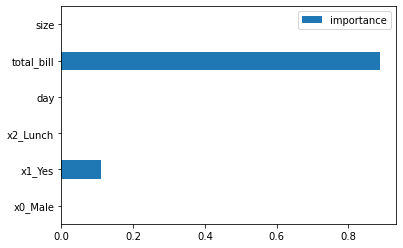

In [78]:
importance_table.plot(kind='barh')

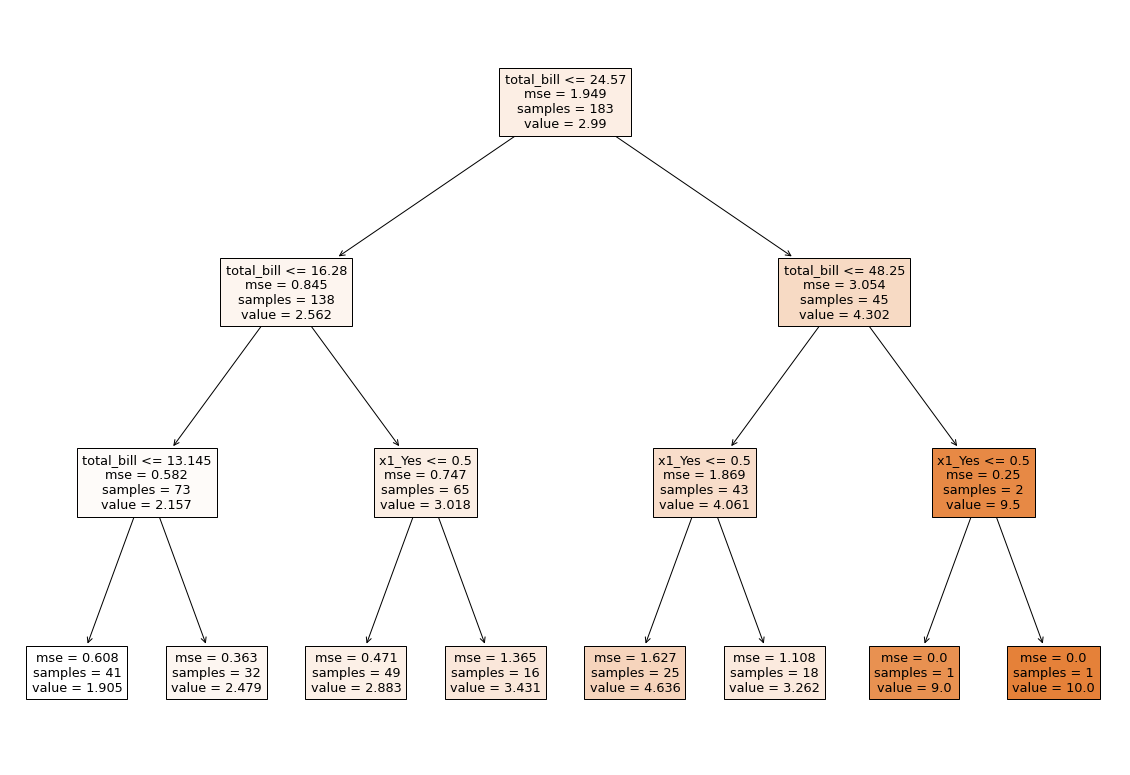

In [79]:
plt.figure(figsize=(20,14))
plot_tree(dtr, feature_names = new_features, filled=True)
plt.show()

## __Outlier__

This time, we will illustrate about outlier (global outlier, contextual outlier and collective outlier) and its effect in the modeling especially linear regression.

In [221]:
x = list(np.random.uniform(155,165,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

<ipython-input-221-c9a109010036>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]


In [222]:
df_association = pd.DataFrame({
    'x': x,
    'y': y,
    'y_real': y_real
})
df_association

,x,y,y_real
0,156.39,53.95,56.74
1,163.07,60.93,59.07
2,158.98,60.08,57.64
3,156.65,57.33,56.83
4,164.28,57.70,59.50
...,...,...,...
95,159.86,58.14,57.95
96,161.06,60.80,58.37
97,160.69,59.00,58.24
98,158.17,59.70,57.36


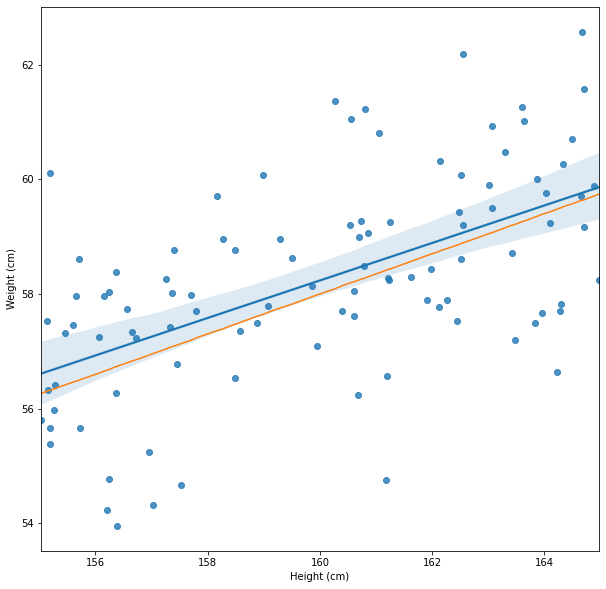

In [223]:
plt.figure(figsize=(10,10))
sns.regplot(x='x', y='y', data=df_association)
sns.lineplot(x='x', y='y_real', data=df_association)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (cm)')
plt.show()

Scatter Plot of two variable without outlier

> ## Global Outlier

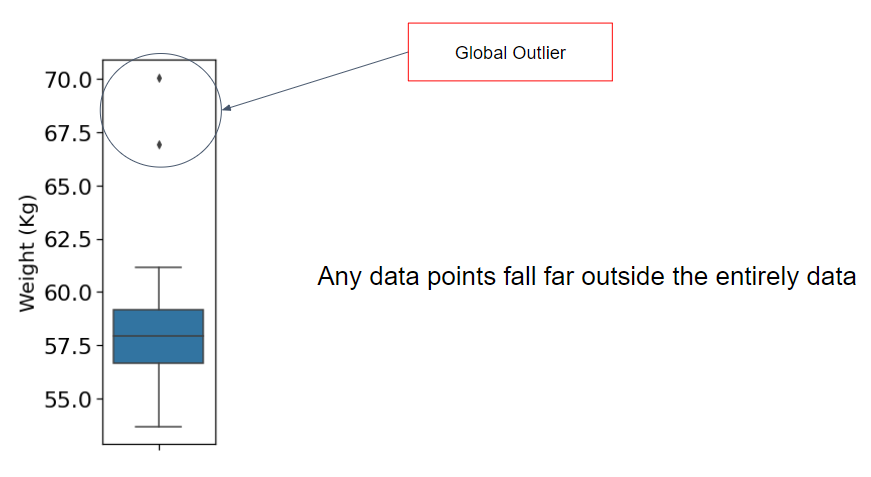

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
x = [191,190]
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_association_outlier = df_association.append(df_add)

<ipython-input-84-438f40996c90>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]


In [85]:
df_association_outlier

,x,y,y_real
0,157.00,54.65,56.95
1,158.45,55.94,57.46
2,163.43,59.30,59.20
3,156.48,55.93,56.77
4,158.21,59.93,57.37
...,...,...,...
97,164.14,59.40,59.45
98,157.54,58.18,57.14
99,155.28,57.07,56.35
0,191.00,70.73,68.85


Text(0, 0.5, 'Weight (Kg)')

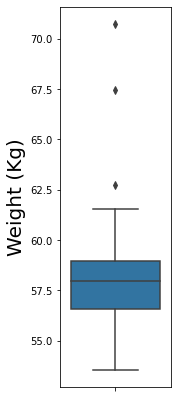

In [86]:
plt.figure(figsize=(2,7))
sns.boxplot(y = df_association_outlier['y'])
plt.ylabel('Weight (Kg)', fontsize = 20)

Global outlier for height

Text(0.5, 0, 'Height (cm)')

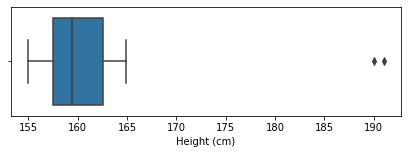

In [87]:
plt.figure(figsize=(7,2))
sns.boxplot(x=df_association_outlier['x'])
plt.xlabel('Height (cm)')

> ## Contextual Outlier

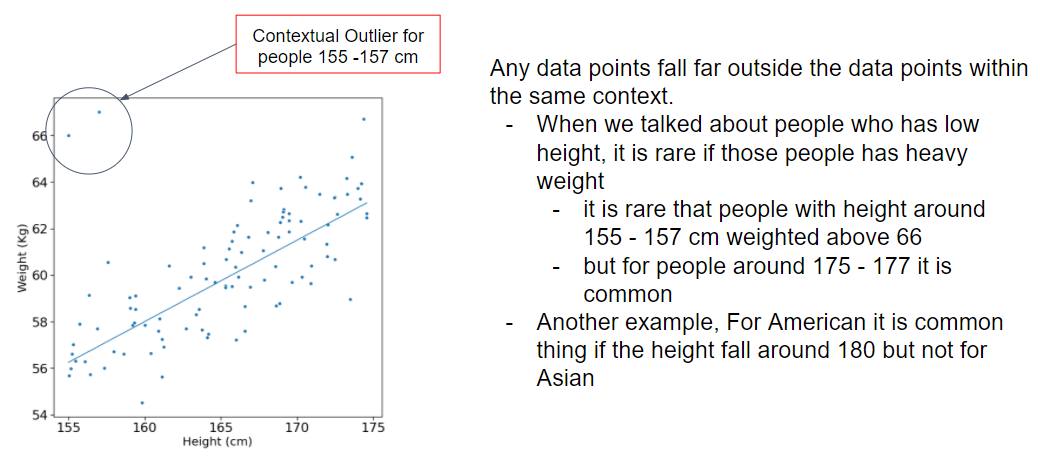

In [88]:
x = list(np.random.uniform(155,175,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

<ipython-input-88-11188d5fdd32>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]


In [89]:
df_association = pd.DataFrame({'x': x, 'y': y, 'y_real': y_real})

In [90]:
x = [155,157]

y = [66,67]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_association_contextual = df_association.append(df_add)

Text(0, 0.5, 'Weight (Kg)')

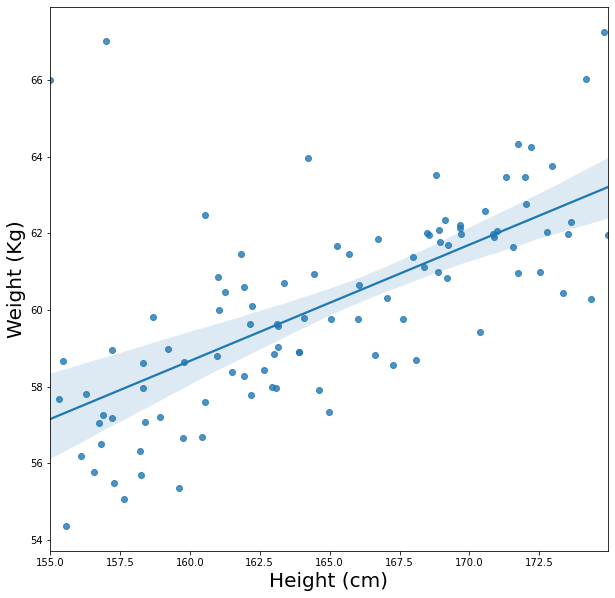

In [91]:
plt.figure(figsize=(10,10))
sns.regplot(x='x', y='y', data=df_association_contextual)
# sns.lineplot(x='x', y='y_real', data=df_association_contextual)
plt.xlabel('Height (cm)', fontsize=20)
plt.ylabel('Weight (Kg)', fontsize=20)

> ## Influential Observation

In [92]:
x = [170, 171, 173, 180]

y = [91, 95, 95, 100]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_association_influenced = df_association.append(df_add)

Text(0, 0.5, 'Weight (kg)')

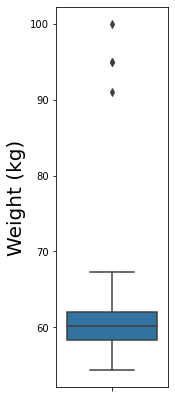

In [93]:
plt.figure(figsize=(2,7))
sns.boxplot(y = df_association_influenced['y'])
plt.ylabel('Weight (kg)', fontsize = 20)

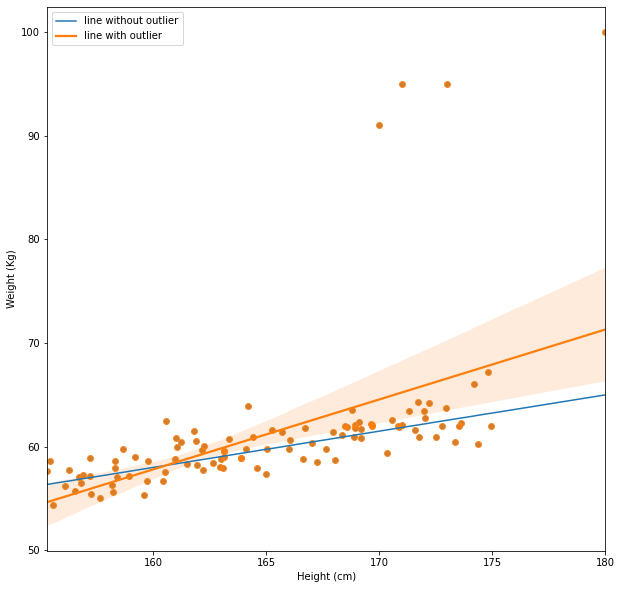

In [94]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='x', y='y', data=df_association_influenced)
sns.lineplot(x='x', y='y_real', data=df_association_influenced)
sns.regplot(x='x', y='y', data = df_association_influenced)
plt.legend(['line without outlier', 'line with outlier'], loc = 'upper left')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (Kg)')
plt.show()

## __Binning__

There is some many kind of relationship exists. Binning can help us capture any type of relationship in the modeling. We will give an illustration about example of binning method and performance improvement using binning.

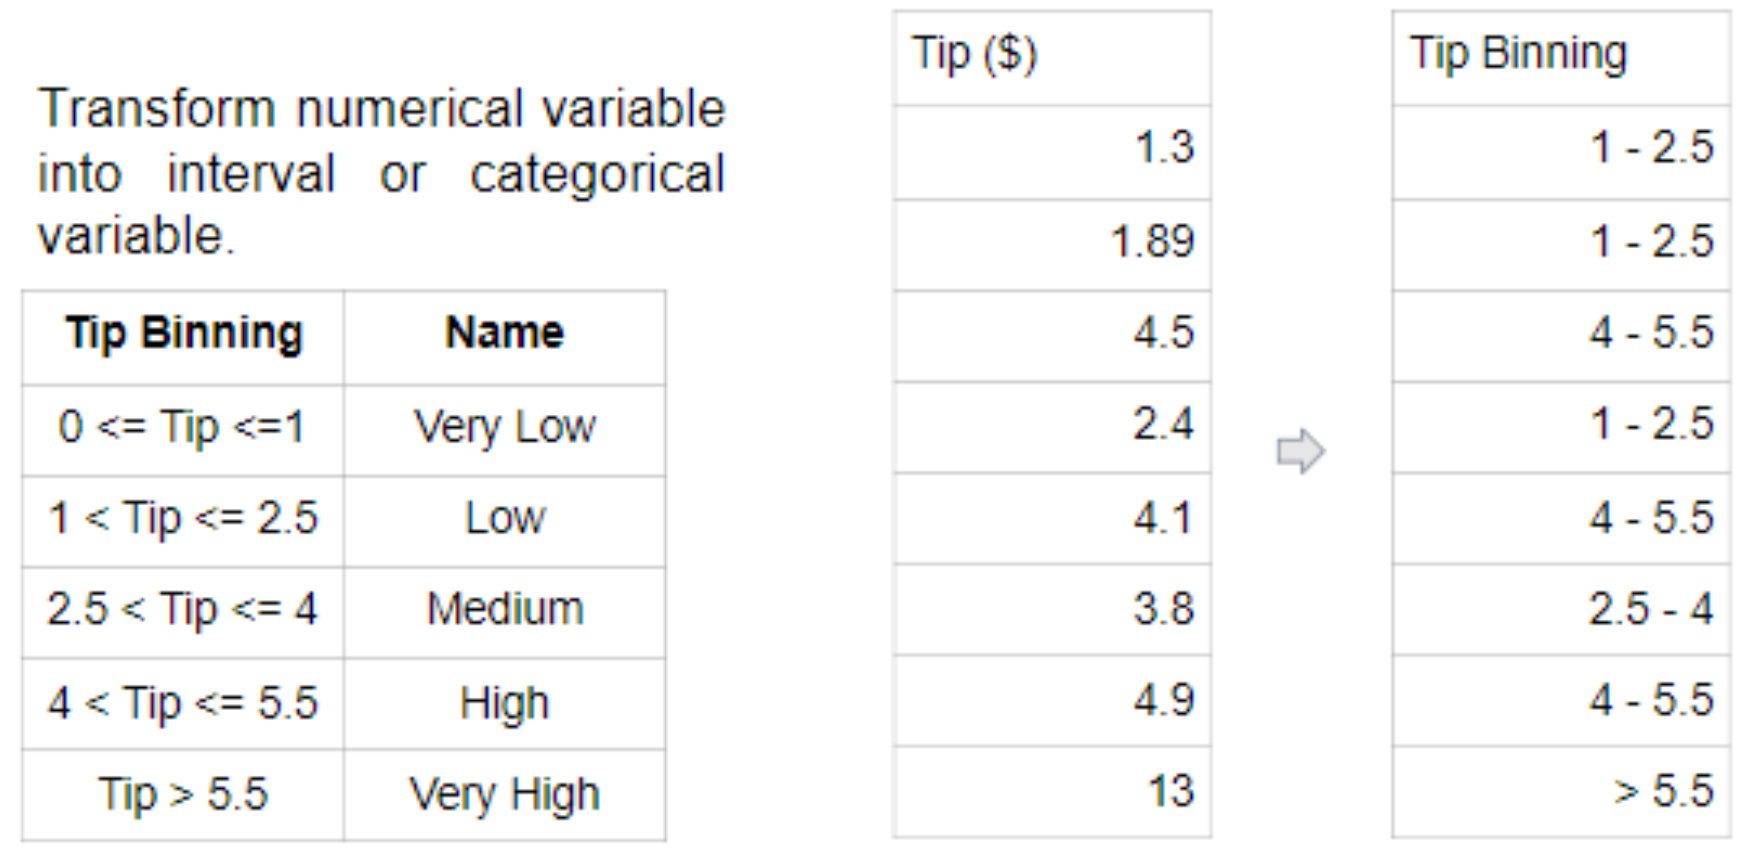

In [95]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


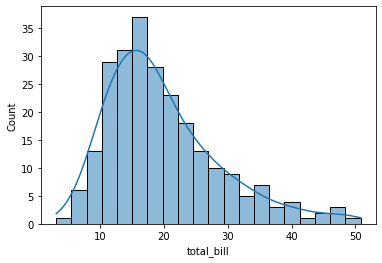

In [96]:
sns.histplot(tips['total_bill'], bins=20, kde=True)
plt.show()

In [97]:
tips2 = tips.copy()
tips2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [98]:
tips2['total_bill_eqfreq'] = pd.qcut(tips2['total_bill'], 5)
tips2['total_bill_eqfreq_encoded'] = pd.qcut(tips2['total_bill'], 5, labels = range(1,6))

In [99]:
tips2['total_bill_eqintv'] = pd.cut(tips2['total_bill'], 5)
tips2['total_bill_eqintv_encoded'] = pd.cut(tips2['total_bill'], 5, labels = range(1,6))

In [100]:
tips2['total_bill total_bill_eqfreq total_bill_eqintv total_bill_eqfreq_encoded total_bill_eqintv_encoded'.split()]

,total_bill,total_bill_eqfreq,total_bill_eqintv,total_bill_eqfreq_encoded,total_bill_eqintv_encoded
0,16.99,"(16.222, 19.818]","(12.618, 22.166]",3,2
1,10.34,"(3.069, 12.636]","(3.022, 12.618]",1,1
2,21.01,"(19.818, 26.098]","(12.618, 22.166]",4,2
3,23.68,"(19.818, 26.098]","(22.166, 31.714]",4,3
4,24.59,"(19.818, 26.098]","(22.166, 31.714]",4,3
...,...,...,...,...,...
239,29.03,"(26.098, 50.81]","(22.166, 31.714]",5,3
240,27.18,"(26.098, 50.81]","(22.166, 31.714]",5,3
241,22.67,"(19.818, 26.098]","(22.166, 31.714]",4,3
242,17.82,"(16.222, 19.818]","(12.618, 22.166]",3,2


> ## Equal Frequencies : Quantile

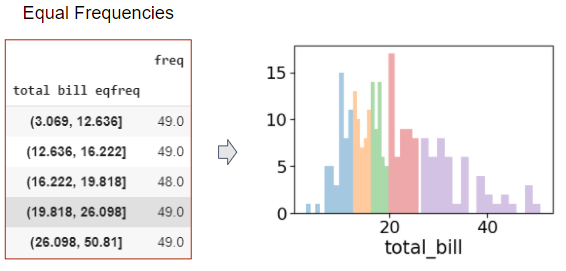

In [101]:
eqfreq = tips2.pivot_table(
    index ='total_bill_eqfreq',
    aggfunc = len,
    values = 'tip'
)
eqfreq.columns = ['freq']
eqfreq

,freq
total_bill_eqfreq,
"(3.069, 12.636]",49.0
"(12.636, 16.222]",49.0
"(16.222, 19.818]",48.0
"(19.818, 26.098]",49.0
"(26.098, 50.81]",49.0


> ## Equal Interval

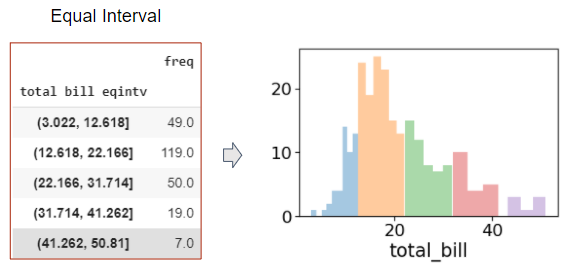

In [102]:
eqintv = tips2.pivot_table(
    index = 'total_bill_eqintv',
    aggfunc = len,
    values = 'tip'
)
eqintv.columns = ['freq']
eqintv

,freq
total_bill_eqintv,
"(3.022, 12.618]",49.0
"(12.618, 22.166]",119.0
"(22.166, 31.714]",50.0
"(31.714, 41.262]",19.0
"(41.262, 50.81]",7.0


C:\Users\johan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


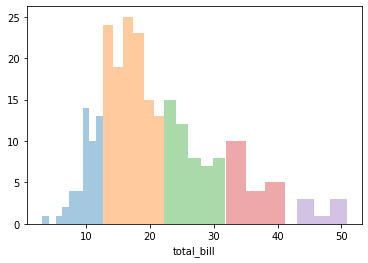

In [103]:
for i in range(1,6):
    sns.distplot(tips2[tips2['total_bill_eqintv_encoded'] == i]['total_bill'], kde=False)

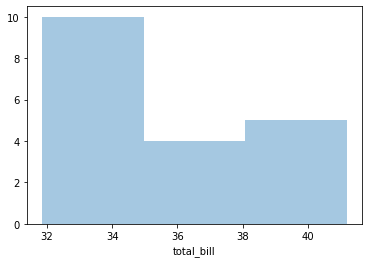

In [104]:
sns.distplot(tips2[tips2['total_bill_eqintv_encoded'] == 4]['total_bill'], kde=False)

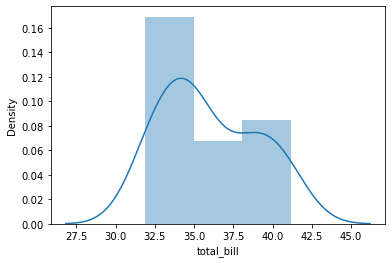

In [105]:
sns.distplot(tips2[tips2['total_bill_eqintv_encoded'] == 4]['total_bill'], kde=True)

In [106]:
tips2[tips2['total_bill_eqintv_encoded'] == 4]['total_bill_eqintv total_bill total_bill_eqintv_encoded'.split()][tips2['total_bill'].between(31.6, 35)]

<ipython-input-106-5e7c862067c9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tips2[tips2['total_bill_eqintv_encoded'] == 4]['total_bill_eqintv total_bill total_bill_eqintv_encoded'.split()][tips2['total_bill'].between(31.6, 35)]


,total_bill_eqintv,total_bill,total_bill_eqintv_encoded
47,"(31.714, 41.262]",32.40,4
52,"(31.714, 41.262]",34.81,4
83,"(31.714, 41.262]",32.68,4
85,"(31.714, 41.262]",34.83,4
141,"(31.714, 41.262]",34.30,4
173,"(31.714, 41.262]",31.85,4
175,"(31.714, 41.262]",32.90,4
179,"(31.714, 41.262]",34.63,4
180,"(31.714, 41.262]",34.65,4
237,"(31.714, 41.262]",32.83,4


> ## Binning Effect on Modeling

Now, we want to illustrate how binning can improve model performance. First, we want to do some data exploreation and then go ahead into the modeling process.

In [107]:
from sklearn.preprocessing import KBinsDiscretizer

In [108]:
disk = pd.read_csv('disk.csv')

In [109]:
disk.head()

,x,class
0,51,0
1,19,1
2,66,1
3,35,0
4,64,1


In [110]:
disk['class'].value_counts(normalize=True)

1    0.51864
0    0.48136
Name: class, dtype: float64

In [111]:
disk.describe()

,x,class
count,1529.000000,1529.000000
mean,42.809026,0.518640
std,14.299211,0.499816
min,18.000000,0.000000
25%,31.000000,0.000000
50%,44.000000,1.000000
75%,55.000000,1.000000
max,67.000000,1.000000


In [112]:
disk['x_eqintv'] = pd.cut(disk['x'], 7)
disk['x_eqintv_encoded'] = pd.cut(disk['x'], 7, labels = range(1,8))

In [113]:
disk.head()

,x,class,x_eqintv,x_eqintv_encoded
0,51,0,"(46.0, 53.0]",5
1,19,1,"(17.951, 25.0]",1
2,66,1,"(60.0, 67.0]",7
3,35,0,"(32.0, 39.0]",3
4,64,1,"(60.0, 67.0]",7


In [114]:
len(disk) # banyaknya data / sample

1529

In [115]:
pd.crosstab(disk['x_eqintv'], disk['class'], normalize=0)

class,0,1
x_eqintv,,
"(17.951, 25.0]",0.224670,0.775330
"(25.0, 32.0]",0.537037,0.462963
"(32.0, 39.0]",0.835616,0.164384
"(39.0, 46.0]",0.846561,0.153439
"(46.0, 53.0]",0.583673,0.416327
"(53.0, 60.0]",0.302632,0.697368
"(60.0, 67.0]",0.068293,0.931707


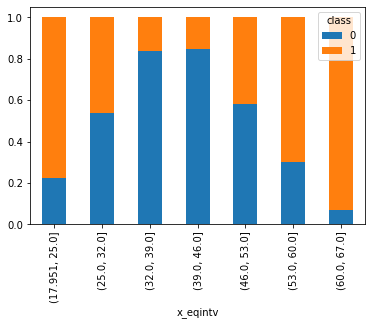

In [116]:
pd.crosstab(disk['x_eqintv'], disk['class'], normalize=0).plot(kind = 'bar', stacked=True)
plt.show()

from illustration above, you can see that the x variabel alraedy binned into seven categories and you can see the class proportion aswell. The propotion of the '1' class keep decreasing until the fourth class and after that the proportion increase instead. This show a non linear relationship between x and the probability of the '1' class. Adding polynomial feature surely can improve the performance but we will try binning instead.

MODEL 1

In [117]:
X = disk[['x']]
y = disk['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2020)

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [119]:
y_pred = logreg.predict(X_test)
print('accuracy', accuracy_score(y_test, y_pred))

accuracy 0.5822454308093995


This is the modeling when we dont use binning. we dont give any treatment to the feature. The model accuracy is 58.22%.

MODEL 2

In [120]:
discretize = KBinsDiscretizer(n_bins=7, encode='onehot', strategy='uniform') # uniform = eqintv ; quantile = eqfreq
discretize.fit(X_train)
X_train_disc = discretize.transform(X_train)
X_test_disc = discretize.transform(X_test)

In [121]:
print(X_train_disc[:5])

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 5)	1.0
  (3, 3)	1.0
  (4, 6)	1.0


In [122]:
logreg = LogisticRegression()
logreg.fit(X_train_disc, y_train)

LogisticRegression()

In [123]:
y_pred = logreg.predict(X_test_disc)
print('accuracy', accuracy_score(y_test, y_pred))

accuracy 0.6997389033942559


After we apply binning, the accuracy significantly improve from 58.22% to 69.97%. Binning surely can be used to improve model performance.

# __Missing Value__

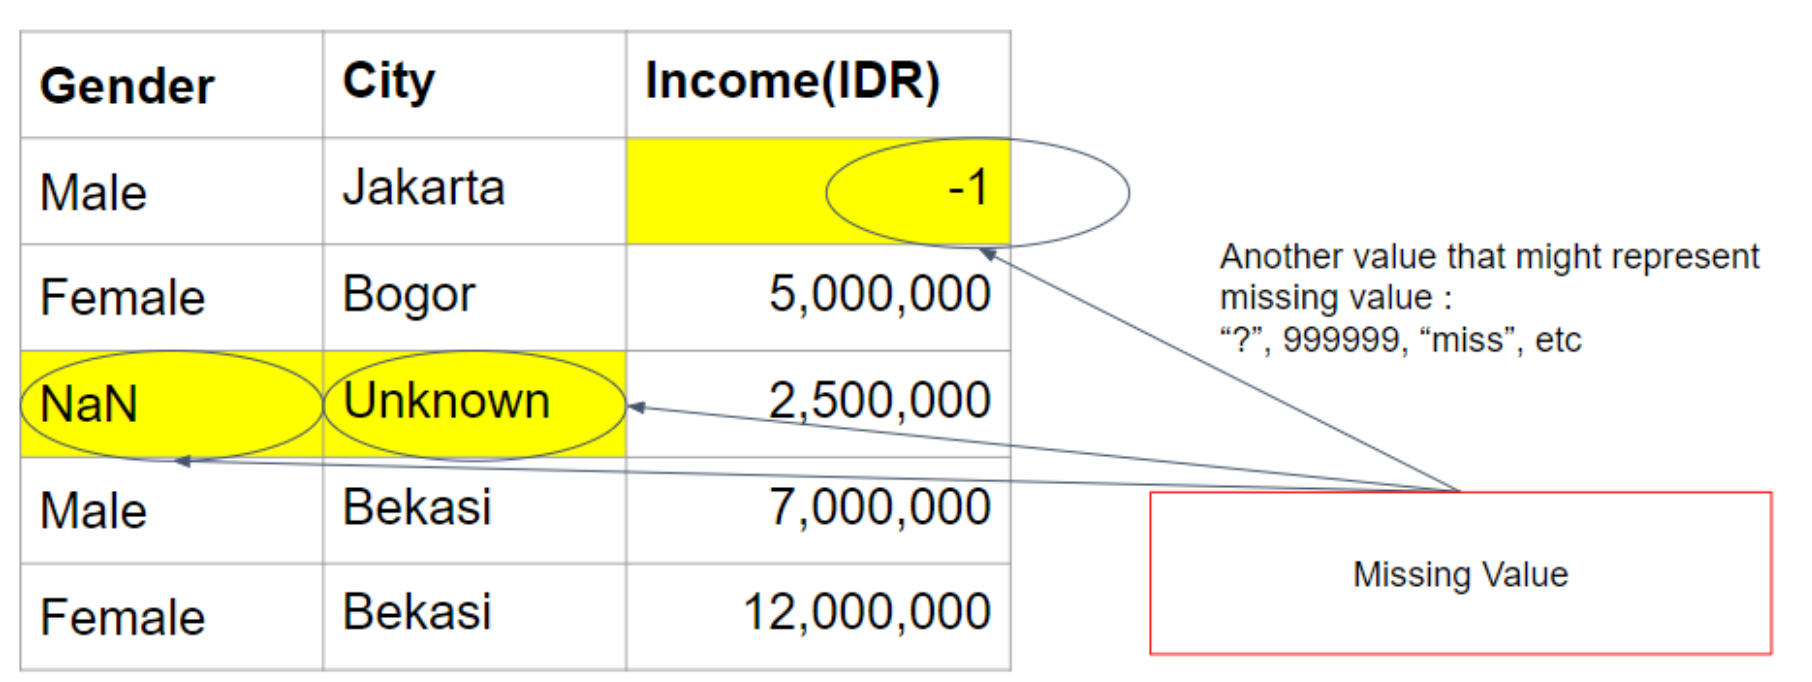

> ## Simple Imputer

In [124]:
df = pd.DataFrame({
    'x1':[4,5,np.nan,6,7,9],
    'x2':[3,5,6,5,np.nan,5],
    'x3':[10,11,12,9,8,11],
    'x4':['A','A','C','C','D',np.nan],
    'x5':['X','Y','X','X',np.nan,'Y'],
    'x6':['M','M',np.nan,'M','N',np.nan],
    'x7':[3,5,4,5,'-',5]
    })
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10,A,X,M,3
1,5.0,5.0,11,A,Y,M,5
2,NaN,6.0,12,C,X,NaN,4
3,6.0,5.0,9,C,X,M,5
4,7.0,NaN,8,D,NaN,N,-
5,9.0,5.0,11,NaN,Y,NaN,5


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5 non-null      float64
 1   x2      5 non-null      float64
 2   x3      6 non-null      int64  
 3   x4      5 non-null      object 
 4   x5      5 non-null      object 
 5   x6      4 non-null      object 
 6   x7      6 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 464.0+ bytes


In [126]:
df['x7'].value_counts()

5    3
4    1
3    1
-    1
Name: x7, dtype: int64

In [127]:
from sklearn.impute import SimpleImputer

In [128]:
imp_num = SimpleImputer(strategy = 'mean')
df[['x1', 'x2', 'x3']] = imp_num.fit_transform(df[['x1', 'x2', 'x3']])
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10.0,A,X,M,3
1,5.0,5.0,11.0,A,Y,M,5
2,6.2,6.0,12.0,C,X,NaN,4
3,6.0,5.0,9.0,C,X,M,5
4,7.0,4.8,8.0,D,NaN,N,-
5,9.0,5.0,11.0,NaN,Y,NaN,5


In [129]:
imp_mode = SimpleImputer(strategy='most_frequent')
df[['x4', 'x5']] = imp_mode.fit_transform(df[['x4', 'x5']])
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10.0,A,X,M,3
1,5.0,5.0,11.0,A,Y,M,5
2,6.2,6.0,12.0,C,X,NaN,4
3,6.0,5.0,9.0,C,X,M,5
4,7.0,4.8,8.0,D,X,N,-
5,9.0,5.0,11.0,A,Y,NaN,5


In [130]:
imp_const = SimpleImputer(strategy='constant', fill_value='P')
df[['x6']] = imp_const.fit_transform(df[['x6']])
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10.0,A,X,M,3
1,5.0,5.0,11.0,A,Y,M,5
2,6.2,6.0,12.0,C,X,P,4
3,6.0,5.0,9.0,C,X,M,5
4,7.0,4.8,8.0,D,X,N,-
5,9.0,5.0,11.0,A,Y,P,5


In [131]:
imp_const = SimpleImputer(missing_values='-', strategy='constant', fill_value=np.nan)
df[['x7']] = imp_const.fit_transform(df[['x7']])
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10.0,A,X,M,3.0
1,5.0,5.0,11.0,A,Y,M,5.0
2,6.2,6.0,12.0,C,X,P,4.0
3,6.0,5.0,9.0,C,X,M,5.0
4,7.0,4.8,8.0,D,X,N,NaN
5,9.0,5.0,11.0,A,Y,P,5.0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      6 non-null      float64
 1   x2      6 non-null      float64
 2   x3      6 non-null      float64
 3   x4      6 non-null      object 
 4   x5      6 non-null      object 
 5   x6      6 non-null      object 
 6   x7      5 non-null      float64
dtypes: float64(4), object(3)
memory usage: 464.0+ bytes


> ## Iterative Imputer

interative imputer works for numerical only. You can fill the missing value simultaneusly.

In [133]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [134]:
df = pd.DataFrame({
    'x1':[4.3,5.1,np.nan,6.3,7.4,9.1],
    'x2':[2.9,5.1,6.3,4.9,np.nan,5.4],
    'x3':[9,11.1,np.nan,8.9,9.1,11.0],
    'x4':['A','A','C','C','D','D']
    })

In [135]:
df

,x1,x2,x3,x4
0,4.3,2.9,9.0,A
1,5.1,5.1,11.1,A
2,NaN,6.3,NaN,C
3,6.3,4.9,8.9,C
4,7.4,NaN,9.1,D
5,9.1,5.4,11.0,D


In [136]:
imp_iter = IterativeImputer(max_iter=10, random_state=0)
df[['x1', 'x2', 'x3']] = imp_iter.fit_transform(df[['x1', 'x2', 'x3']])

In [137]:
df

,x1,x2,x3,x4
0,4.30000,2.900000,9.000000,A
1,5.10000,5.100000,11.100000,A
2,7.18363,6.300000,9.823389,C
3,6.30000,4.900000,8.900000,C
4,7.40000,5.073866,9.100000,D
5,9.10000,5.400000,11.000000,D


> ##  Nearest Neighbour Imputer

Nearest negihbour imputer also work for numerical only. You can also fill the missing value simultaneusly.

In [138]:
from sklearn.impute import KNNImputer

In [139]:
df = pd.DataFrame({
    'x1':[4.3,5.1,np.nan,6.3,7.4,9.1],
    'x2':[2.9,5.1,6.3,4.9,np.nan,5.4],
    'x3':[9,11.1,np.nan,8.9,9.1,11.0],
    'x4':['A','A','C','C','D','D']
    })

In [140]:
df

,x1,x2,x3,x4
0,4.3,2.9,9.0,A
1,5.1,5.1,11.1,A
2,NaN,6.3,NaN,C
3,6.3,4.9,8.9,C
4,7.4,NaN,9.1,D
5,9.1,5.4,11.0,D


In [141]:
imp_knn = KNNImputer(n_neighbors=2, weights='uniform')
df[['x1', 'x2', 'x3']] = imp_knn.fit_transform(df[['x1', 'x2', 'x3']])

In [142]:
df

,x1,x2,x3,x4
0,4.3,2.90,9.00,A
1,5.1,5.10,11.10,A
2,7.1,6.30,11.05,C
3,6.3,4.90,8.90,C
4,7.4,5.15,9.10,D
5,9.1,5.40,11.00,D


# Generate New Features : Polynomial

Relationship between variables often appear to be unlinear. Thus, when you still wanna use linear model (logistic regression and linear regression) you can add polynomial features.

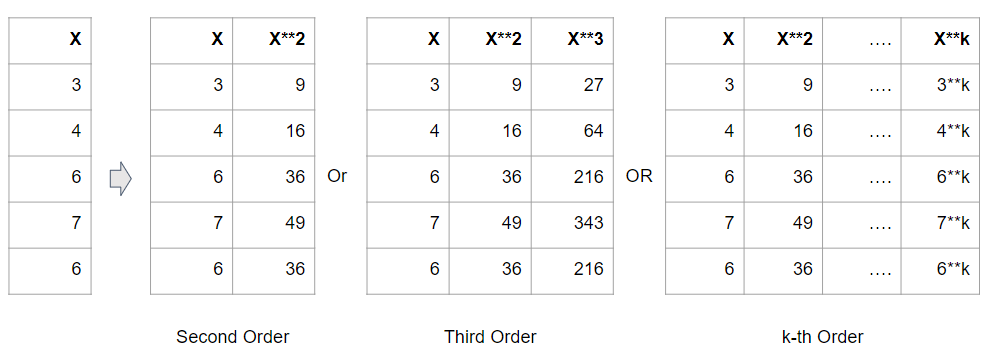

In [143]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In the illustration below, you can see how is the effect of the polynomial feature. We will do modeling twice. First, without polynomial features. Second, with polynomial features. The target variabel is
1. (+) a good quality wine : quality > 6
1. (-) a bad quality wine : quality <= 6

<br>
Features: alcohol and density

In [144]:
wine = pd.read_csv('white_wine.csv')

In [224]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,7.8,0.28,0.32,9.0,0.036,34.0,115.0,1.0002,3.17,0.39,10.3,7.0,1
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0,0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0,0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0,0


In [145]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

In [146]:
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)
wine['label'] = np.where(wine['quality']>6,1,0)
wine['label'].value_counts()

0    422
1     98
Name: label, dtype: int64

In [147]:
wine.dropna(inplace=True)

In [148]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
label                   0
dtype: int64

In [149]:
X = wine[['density', 'alcohol']]
y = wine['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=2020)

MODEL 1: Tanpa Polynomial

In [150]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [151]:
y_pred = logreg.predict(X_test)
print('accuracy', accuracy_score(y_test, y_pred))

accuracy 0.8615384615384616


MODEL 2: Menggunakan Polynomial

In [152]:
poly = PolynomialFeatures(degree = 3, include_bias=False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [153]:
poly.get_feature_names()

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']

In [154]:
X_train

,density,alcohol
483,0.9964,9.2
369,0.9941,11.6
160,0.9948,12.4
114,0.9968,9.1
371,0.9931,10.6
...,...,...
376,0.9969,10.4
157,0.9948,12.4
69,0.9962,9.5
347,0.9995,8.8


In [155]:
pd.DataFrame(X_train_poly, columns = poly.get_feature_names())

,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3
0,0.9964,9.2,0.992813,9.16688,84.64,0.989239,9.133879,84.335296,778.688
1,0.9941,11.6,0.988235,11.53156,134.56,0.982404,11.463524,133.766096,1560.896
2,0.9948,12.4,0.989627,12.33552,153.76,0.984481,12.271375,152.960448,1906.624
3,0.9968,9.1,0.993610,9.07088,82.81,0.990431,9.041853,82.545008,753.571
4,0.9931,10.6,0.986248,10.52686,112.36,0.979443,10.454225,111.584716,1191.016
...,...,...,...,...,...,...,...,...,...
384,0.9969,10.4,0.993810,10.36776,108.16,0.990729,10.335620,107.824704,1124.864
385,0.9948,12.4,0.989627,12.33552,153.76,0.984481,12.271375,152.960448,1906.624
386,0.9962,9.5,0.992414,9.46390,90.25,0.988643,9.427937,89.907050,857.375
387,0.9995,8.8,0.999000,8.79560,77.44,0.998501,8.791202,77.401280,681.472


In [156]:
logreg = LogisticRegression()
logreg.fit(X_train_poly, y_train)

LogisticRegression()

In [157]:
y_pred = logreg.predict(X_test_poly)
print('accuracy', accuracy_score(y_test, y_pred))

accuracy 0.9461538461538461


## __Polynomial Regression__

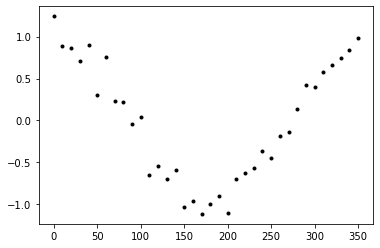

In [158]:
np.random.seed(1)
x = np.arange(0, 360, 10)
y = np.cos(x * np.pi/180) + np.random.normal(0,0.15,len(x))
df_poly = pd.DataFrame({'x':x, 'y':y})
plt.plot(df_poly['x'], df_poly['y'], 'k.')
plt.show()

In [159]:
from sklearn.linear_model import Lasso

lrp = LinearRegression()
rip = Ridge(alpha=1)
lap = Lasso(alpha=2)

lrp.fit(df_poly[['x']], df_poly['y'])
rip.fit(df_poly[['x']], df_poly['y'])
lap.fit(df_poly[['x']], df_poly['y'])


Lasso(alpha=2)

In [225]:
df_poly

,x,y,linear,ridge,lasso
0,0,1.243652,0.080355,0.080354,0.047922
1,10,0.893044,0.074548,0.074548,0.043969
2,20,0.860467,0.068741,0.068741,0.040015
3,30,0.705080,0.062935,0.062934,0.036062
4,40,0.895856,0.057128,0.057128,0.032109
5,50,0.297557,0.051321,0.051321,0.028155
6,60,0.761722,0.045515,0.045514,0.024202
7,70,0.227839,0.039708,0.039708,0.020248
8,80,0.221504,0.033901,0.033901,0.016295
9,90,-0.037406,0.028095,0.028094,0.012342


In [160]:
df_poly['linear'] = lrp.predict(df_poly[['x']])
df_poly['ridge'] = rip.predict(df_poly[['x']])
df_poly['lasso'] = lap.predict(df_poly[['x']])

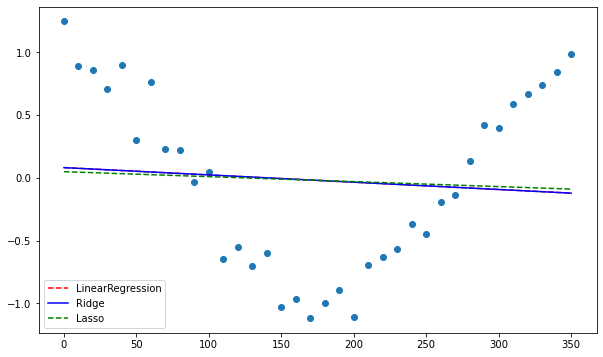

In [161]:
plt.figure(figsize=(10,6))
plt.scatter(df_poly['x'], df_poly['y'])
plt.plot(df_poly['x'], df_poly['linear'], 'r--', label='LinearRegression')
plt.plot(df_poly['x'], df_poly['ridge'], 'b-', label='Ridge')
plt.plot(df_poly['x'], df_poly['lasso'], 'g--', label='Lasso')
# plt.plot(df_poly['x'], df_poly['elastic'], 'm--', label='ElasticNet')
plt.legend()
plt.show()

In [162]:
df_poly.head()

,x,y,linear,ridge,lasso
0,0,1.243652,0.080355,0.080354,0.047922
1,10,0.893044,0.074548,0.074548,0.043969
2,20,0.860467,0.068741,0.068741,0.040015
3,30,0.705080,0.062935,0.062934,0.036062
4,40,0.895856,0.057128,0.057128,0.032109


In [163]:
df_poly[['x', 'y']].corr()

,x,y
x,1.000000,-0.085534
y,-0.085534,1.000000


In [164]:
poly = PolynomialFeatures(3, include_bias=False)
feature_poly = poly.fit_transform(df_poly[['x']])
poly_df = pd.DataFrame(feature_poly, columns=poly.get_feature_names())
poly_df['y'] = df_poly['y']

In [165]:
poly_df.head()

,x0,x0^2,x0^3,y
0,0.0,0.0,0.0,1.243652
1,10.0,100.0,1000.0,0.893044
2,20.0,400.0,8000.0,0.860467
3,30.0,900.0,27000.0,0.705080
4,40.0,1600.0,64000.0,0.895856


In [166]:
lr_poly = LinearRegression().fit(poly_df[['x0', 'x0^2']], poly_df['y'])
poly_df['y_pred'] = lr_poly.predict(poly_df[['x0', 'x0^2']])

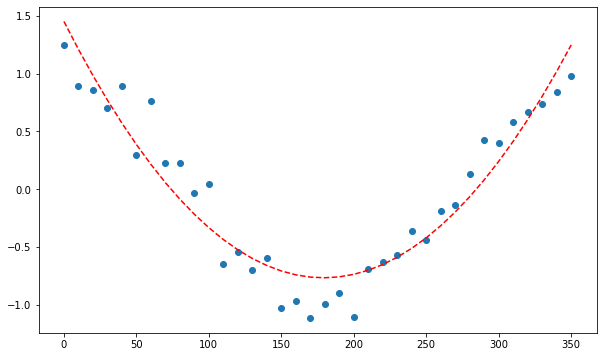

In [167]:
plt.figure(figsize=(10,6))
plt.scatter(poly_df['x0'], poly_df['y'])
plt.plot(poly_df['x0'], poly_df['y_pred'], 'r--', label='LinearRegression')
plt.show()

# Apply Several Preprocessing Method to Modeling at once Part 2

> ## Table Of Contents

1. Data
1. EDA
1. Missing value Exploration
1. Preprocessing
1. Data Splitting
1. Data Transformation
1. Model fitting and evaluation
1. Model properties

> ## Data

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
<br>
Fields:
<br>
The dataset contains 16 columns
<br>
Target filed: Income
<br>
-- The income is divide into two classes: 50K
<br>
Number of attributes: 14
<br>
-- These are the demographics and other 
<br>
features to describe a person

We will explore the possibility in predicting income level based on the individual’s personal information.


In [168]:
adult = pd.read_csv('adult.csv')
adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [169]:
adult['income'].value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [170]:
adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [171]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


> ## Missing Value

Missing value in this dataset marked with "?"

In [172]:
adult.replace('?', np.nan, inplace=True)

In [173]:
adult.isna().sum()/len(adult)

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    0.017905
income            0.000000
dtype: float64

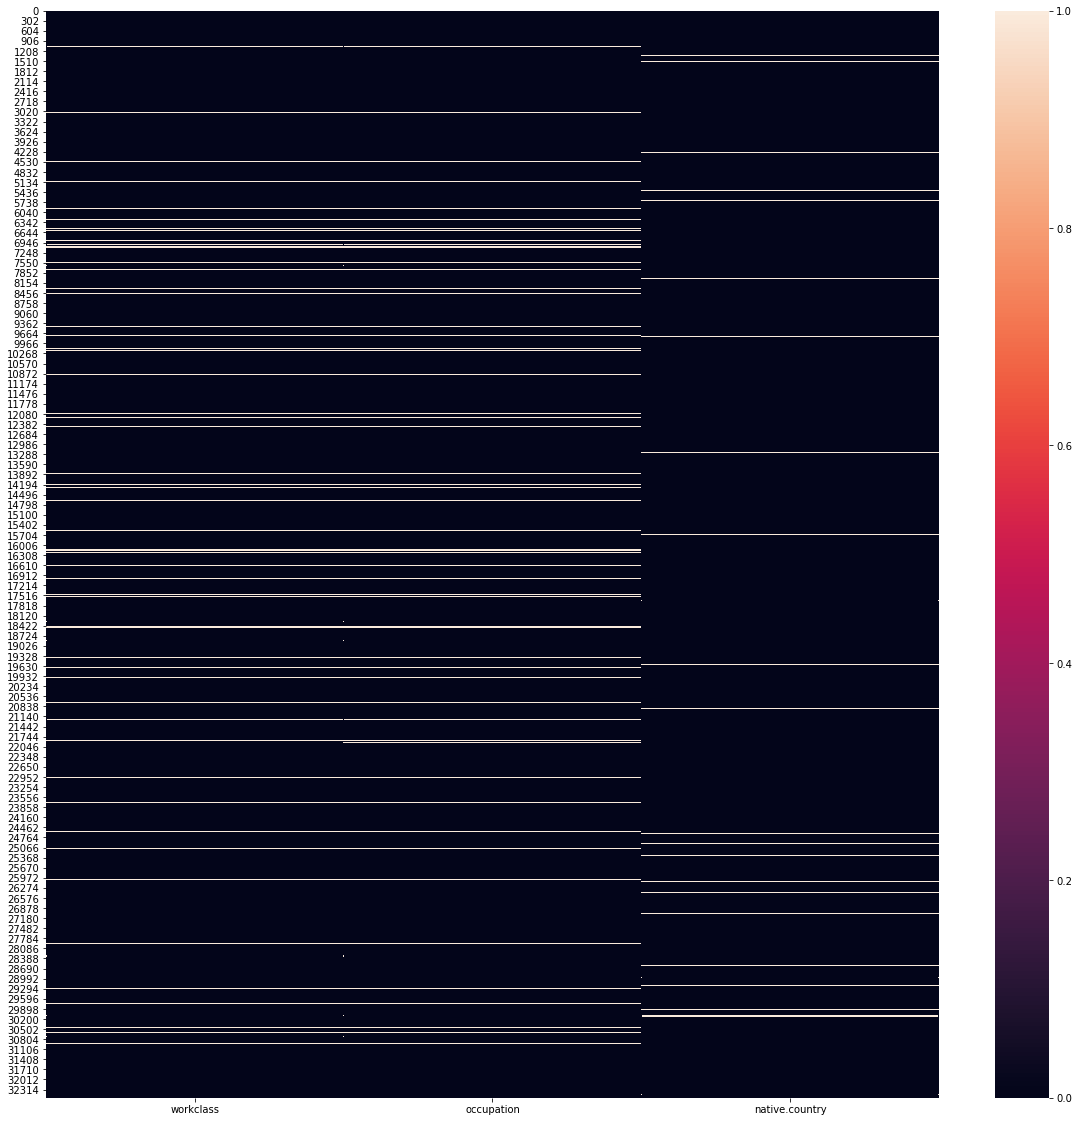

In [174]:
plt.figure(figsize=(20, 20))
sns.heatmap(adult[['workclass', 'occupation', 'native.country']].isna())

The Missing Variable:
1. workclass
1. occupation
1. native.country

> ## Preprocessing

In [175]:
categorical_features = adult.columns[adult.dtypes == object]
adult[categorical_features].describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [176]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

preprocess scheme:
1. one hot encoding : relationship, race, sex
1. binary encoding : workclass, marital status, occupation, native country  
1. ordinal encoding : education (already encoded)
1. no treatment : size

In [177]:
binary_encoder_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value = 'NC')),
    ('binary', ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['relationship', 'race', 'sex']),
    ('binary_pipe', binary_encoder_pipeline, ['workclass', 'marital.status', 'occupation', 'native.country'])
], remainder='passthrough')

> ## Data Splitting

In [178]:
X = adult.drop(columns = ['fnlwgt', 'income', 'education'], axis=1)
y = np.where(adult['income']=='>50K', 1, 0)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)

> ## Data Transformation

In [180]:
len(X_train)

24420

In [181]:
X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
29849,20,Private,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States
30319,20,Private,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,55,United-States
1878,47,State-gov,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,50,United-States
20686,50,Self-emp-not-inc,10,Divorced,Exec-managerial,Unmarried,Asian-Pac-Islander,Female,0,0,40,NaN
26007,39,Private,10,Never-married,Machine-op-inspct,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines


In [182]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [183]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,20.0,10.0,0.0,0.0,10.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,20.0,9.0,0.0,0.0,55.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,47.0,16.0,15024.0,0.0,50.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,50.0,10.0,0.0,0.0,40.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,39.0,10.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,31.0,10.0,0.0,0.0,35.0
24416,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,23.0,12.0,0.0,0.0,16.0
24417,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,38.0,11.0,0.0,0.0,40.0
24418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,47.0,9.0,0.0,0.0,40.0


In [184]:
X_train['workclass'].unique()

array(['Private', 'State-gov', 'Self-emp-not-inc', nan, 'Local-gov',
       'Federal-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [185]:
transformer.transformers_

[('onehot', OneHotEncoder(drop='first'), ['relationship', 'race', 'sex']),
 ('binary_pipe',
  Pipeline(steps=[('imputer',
                   SimpleImputer(fill_value='NC', strategy='constant')),
                  ('binary', BinaryEncoder())]),
  ['workclass', 'marital.status', 'occupation', 'native.country']),
 ('remainder', 'passthrough', [0, 2, 8, 9, 10])]

In [186]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Not-in-family', 'x0_Other-relative', 'x0_Own-child',
       'x0_Unmarried', 'x0_Wife', 'x1_Asian-Pac-Islander', 'x1_Black',
       'x1_Other', 'x1_White', 'x2_Male'], dtype=object)

In [187]:
transformer.transformers_[1][1]['binary'].get_feature_names()

['0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '3_0',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '3_6']

In [188]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1]['binary'].get_feature_names() + 'age education.num capital.gain capital.loss hours.per.week'.split()
len(features)

36

In [189]:
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features
X_train_preprocessed

,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Asian-Pac-Islander,x1_Black,x1_Other,x1_White,x2_Male,...,3_2,3_3,3_4,3_5,3_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,20.0,10.0,0.0,0.0,10.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,20.0,9.0,0.0,0.0,55.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,47.0,16.0,15024.0,0.0,50.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,50.0,10.0,0.0,0.0,40.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,39.0,10.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,31.0,10.0,0.0,0.0,35.0
24416,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,23.0,12.0,0.0,0.0,16.0
24417,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,38.0,11.0,0.0,0.0,40.0
24418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,47.0,9.0,0.0,0.0,40.0


> ## Model Fitting and evaluation

In [229]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier(max_depth=3)

In [230]:
y_pred = model.predict(X_test_preprocessed)
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.8355238914138312


> ## Model Properties

In [238]:
importance_table = pd.DataFrame({
    'imp': model.feature_importances_,
    
}, index=features)
importance_table.sort_values('imp', ascending=False)

,imp
1_3,0.472094
capital.gain,0.264498
education.num,0.261116
age,0.002291
3_1,0.000000
2_1,0.000000
2_2,0.000000
2_3,0.000000
2_4,0.000000
3_0,0.000000


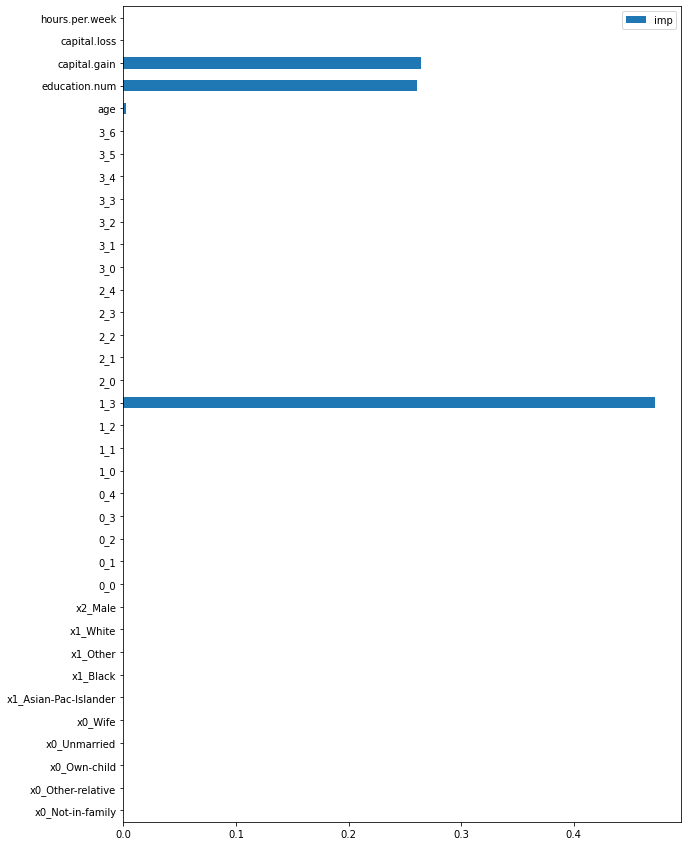

In [193]:
importance_table.plot(kind='barh', figsize=(10,15))
plt.show()

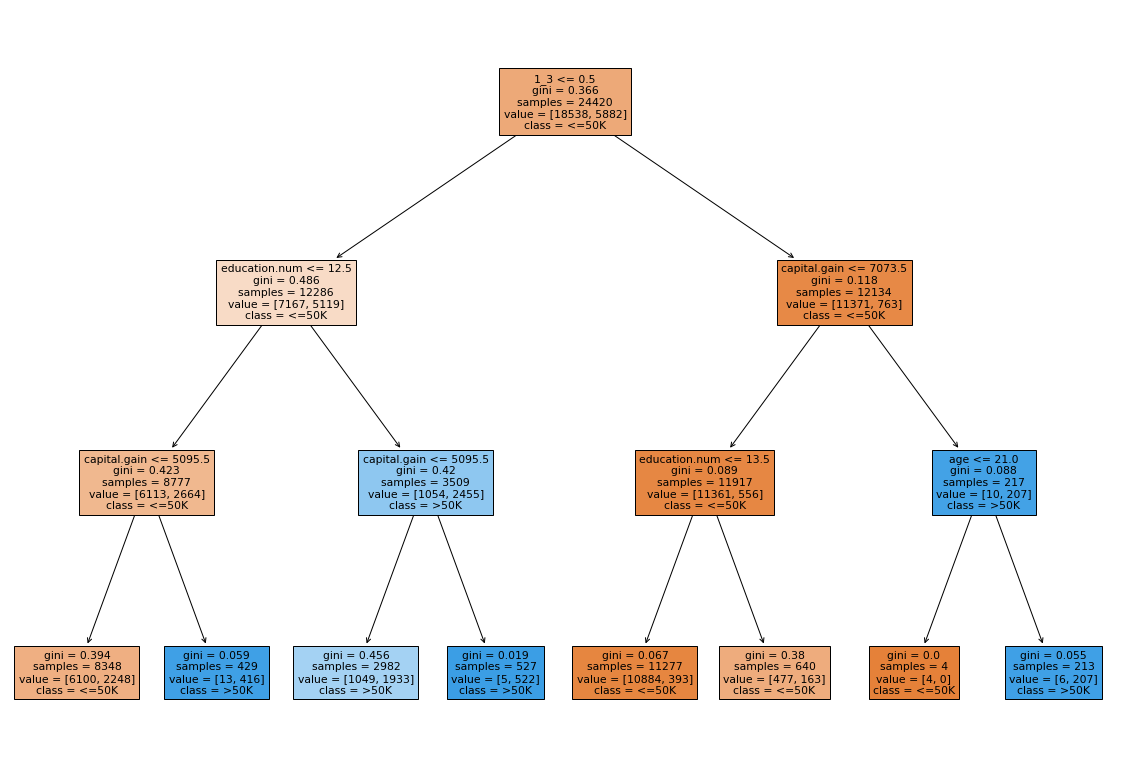

In [194]:
plt.figure(figsize=(20,14))
plot_tree(model, feature_names=features, filled=True, class_names = ['<=50K', '>50K'])
plt.show()

In [195]:
x = np.arange(0, 360, 10)
y = np.arange(100, 460, 10)
df_coba = pd.DataFrame(x)
df_coba['y'] = y
df_coba

,0,y
0,0,100
1,10,110
2,20,120
3,30,130
4,40,140
5,50,150
6,60,160
7,70,170
8,80,180
9,90,190


In [196]:
# pipe = Pipeline([
#     ('standard', StandardScaler()),
#     ('model', DecisionTreeRegressor(max_depth=3))
# ])

In [197]:
# X_train, X_test, y_train, y_test = train_test_split(df_coba[[0]], df_coba['y'])

In [198]:
# pipe.fit(X_train, y_train)

In [199]:
# y_pred = pipe.predict(X_test)
# mean_squared_error(y_test, y_pred)

In [200]:
# pipe.transform(X_train)

In [201]:
# X_train

In [202]:
# y_train

In [203]:
# y_pred

In [204]:
# result = pd.DataFrame()
# result['y_test'] = y_test
# result['y_pred'] = y_pred
# result

## __Feature Selection__

> ## Table Of Content

1. data transform
1. feature selection : slect percentile
1. model fitting and evaluation : logistic regression

In [205]:
from sklearn.feature_selection import SelectPercentile

> ## Data Transformation

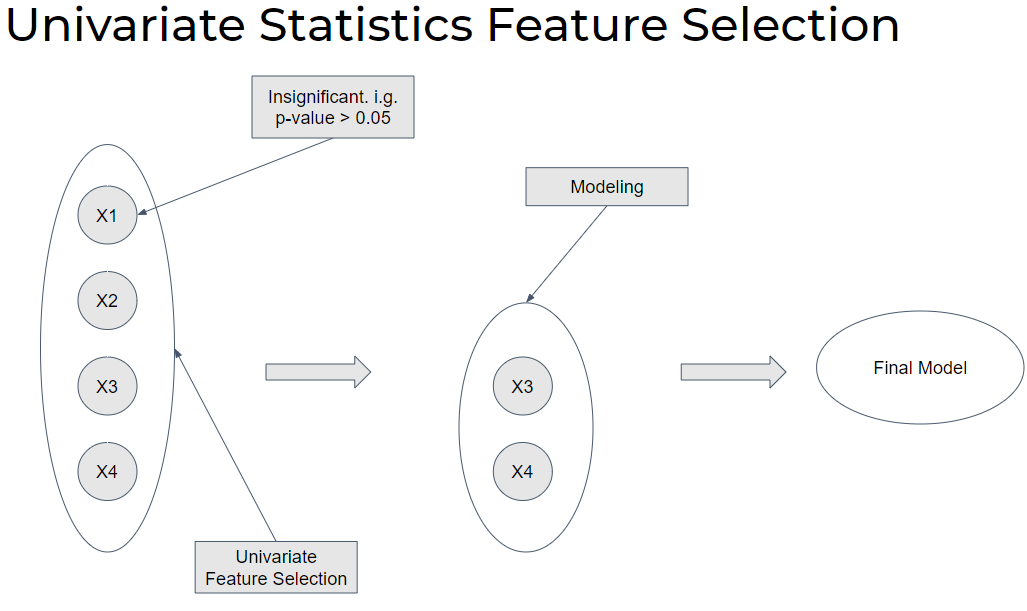

In [206]:
select = SelectPercentile(percentile=50)
select.fit(X_train_preprocessed, y_train)

C:\Users\johan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [10 15 19 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\johan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectPercentile(percentile=50)

In [207]:
X_train_selected = select.transform(X_train_preprocessed)
X_test_selected = select.transform(X_test_preprocessed)

In [208]:
print('before selection', X_train_preprocessed.shape)
print('after selection', X_train_selected.shape)

before selection (24420, 36)
after selection (24420, 18)


In [209]:
mask = select.get_support()
mask

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True, False, False, False,  True, False, False,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True])

In [210]:
select.scores_

array([8.86311260e+02, 1.80991858e+02, 1.34752288e+03, 5.26323271e+02,
       4.03640797e+02, 2.25409099e+00, 2.08042370e+02, 2.32742552e+01,
       1.88902365e+02, 1.17074210e+03,            nan, 5.08067661e+00,
       1.09767688e+02, 3.39490181e+02, 6.79861916e+00,            nan,
       2.85935729e+02, 3.55643399e+03, 5.04064537e+03,            nan,
       1.67910809e+01, 1.47823932e+01, 1.58800444e+02, 1.72917567e+02,
                  nan, 1.39819638e+01, 1.50181369e-01, 3.05060564e+00,
       6.00145357e+01, 8.45239273e-01, 2.19023444e+01, 1.41392835e+03,
       3.06915542e+03, 1.30892873e+03, 5.00002084e+02, 1.39203252e+03])

In [211]:
X_train_preprocessed['0_0'].describe()

count    24420.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: 0_0, dtype: float64

In [212]:
selected_features = pd.DataFrame({
    'indicator': mask,
    'score': select.scores_,
    'features': features
})
selected_features

,indicator,score,features
0,True,886.311260,x0_Not-in-family
1,True,180.991858,x0_Other-relative
2,True,1347.522879,x0_Own-child
3,True,526.323271,x0_Unmarried
4,True,403.640797,x0_Wife
5,False,2.254091,x1_Asian-Pac-Islander
6,True,208.042370,x1_Black
7,False,23.274255,x1_Other
8,True,188.902365,x1_White
9,True,1170.742103,x2_Male


> ## Model Fitting and Evaluation

In [213]:
model = LogisticRegression(max_iter=1000, solver='liblinear', C=10)
model.fit(X_train_selected, y_train)
print('score', model.score(X_test_selected, y_test))

score 0.8383490971625107


In [214]:
accuracy_score(y_test, model.predict(X_test_selected))

0.8383490971625107

In [215]:
model2 = LogisticRegression(max_iter=1000, solver='liblinear', C=10)
model2.fit(X_train_preprocessed, y_train)
print('score', model2.score(X_test_preprocessed, y_test))

score 0.8398231175531261


## __Recursive Feature Selection__

In [216]:
from sklearn.feature_selection import RFE

In [217]:
selector = RFE(model2, n_features_to_select = 10, step=1)
selector.fit(X_train_preprocessed, y_train)
selector.support_

array([ True,  True,  True,  True,  True, False, False,  True, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False])

In [218]:
rfe_df = pd.DataFrame({'indicator': selector.support_, 'features': X_train_preprocessed.columns})
selected = rfe_df[rfe_df['indicator'] == True]['features']

In [242]:
rfe_df

,indicator,features
0,True,x0_Not-in-family
1,True,x0_Other-relative
2,True,x0_Own-child
3,True,x0_Unmarried
4,True,x0_Wife
5,False,x1_Asian-Pac-Islander
6,False,x1_Black
7,True,x1_Other
8,False,x1_White
9,True,x2_Male


In [241]:
selected

0      x0_Not-in-family
1     x0_Other-relative
2          x0_Own-child
3          x0_Unmarried
4               x0_Wife
7              x1_Other
9               x2_Male
11                  0_1
17                  1_2
25                  3_1
Name: features, dtype: object

In [219]:
model3 = LogisticRegression(max_iter=1000, solver='liblinear', C=10)
model3.fit(X_train_preprocessed[selected], y_train)
model3.score(X_test_preprocessed[selected], y_test)

0.7592433361994841